In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [4]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']



In [5]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod'
]

In [6]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [8]:
len(y_val)

1409

In [9]:
(y_val == churn_decision).sum()

np.int64(1132)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >=t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.509
0.10 0.591
0.15 0.666
0.20 0.710
0.25 0.739
0.30 0.760
0.35 0.772
0.40 0.785
0.45 0.793
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


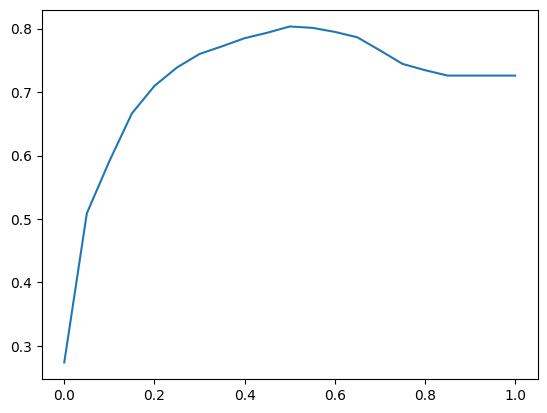

In [12]:
plt.plot(thresholds, scores)

In [13]:
from collections import Counter

In [14]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

### 4.3 - Confusion table

In [15]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [16]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [17]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [18]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [19]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [ ]:
confusion_matrix

array([[922, 101],
       [176, 210]])

In [21]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

In [22]:
(tp + tn) / (tp + tn + fp + fn)

np.float64(0.8034066713981547)

In [23]:
p = tp / (tp + fp)

In [24]:
p

np.float64(0.6752411575562701)

In [25]:
tp + fp

np.int64(311)

In [26]:
tp

np.int64(210)

In [27]:
r = tp / (tp + fn)

In [28]:
r

np.float64(0.5440414507772021)

In [29]:
tpr = tp / (tp + fn)

In [30]:
tpr

np.float64(0.5440414507772021)

In [31]:
fpr = fp / (fp + tn)

In [32]:
fpr

np.float64(0.09872922776148582)

In [33]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [34]:
scores

[(np.float64(0.0), np.int64(386), np.int64(1023), np.int64(0), np.int64(0)),
 (np.float64(0.01), np.int64(385), np.int64(913), np.int64(1), np.int64(110)),
 (np.float64(0.02), np.int64(384), np.int64(830), np.int64(2), np.int64(193)),
 (np.float64(0.03), np.int64(383), np.int64(766), np.int64(3), np.int64(257)),
 (np.float64(0.04), np.int64(381), np.int64(715), np.int64(5), np.int64(308)),
 (np.float64(0.05), np.int64(379), np.int64(685), np.int64(7), np.int64(338)),
 (np.float64(0.06), np.int64(377), np.int64(661), np.int64(9), np.int64(362)),
 (np.float64(0.07), np.int64(372), np.int64(641), np.int64(14), np.int64(382)),
 (np.float64(0.08), np.int64(371), np.int64(613), np.int64(15), np.int64(410)),
 (np.float64(0.09), np.int64(369), np.int64(580), np.int64(17), np.int64(443)),
 (np.float64(0.1), np.int64(366), np.int64(556), np.int64(20), np.int64(467)),
 (np.float64(0.11), np.int64(365), np.int64(528), np.int64(21), np.int64(495)),
 (np.float64(0.12), np.int64(365), np.int64(509), 

In [35]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

In [36]:
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,556,20,467
20,0.2,333,356,53,667
30,0.3,284,236,102,787
40,0.4,249,166,137,857
50,0.5,210,101,176,922
60,0.6,150,53,236,970
70,0.7,76,20,310,1003
80,0.8,13,1,373,1022
90,0.9,0,0,386,1023


In [37]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

In [38]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,385,913,1,110,0.997409,0.892473
2,0.02,384,830,2,193,0.994819,0.811339
3,0.03,383,766,3,257,0.992228,0.748778
4,0.04,381,715,5,308,0.987047,0.698925
...,...,...,...,...,...,...,...
96,0.96,0,0,386,1023,0.000000,0.000000
97,0.97,0,0,386,1023,0.000000,0.000000
98,0.98,0,0,386,1023,0.000000,0.000000
99,0.99,0,0,386,1023,0.000000,0.000000


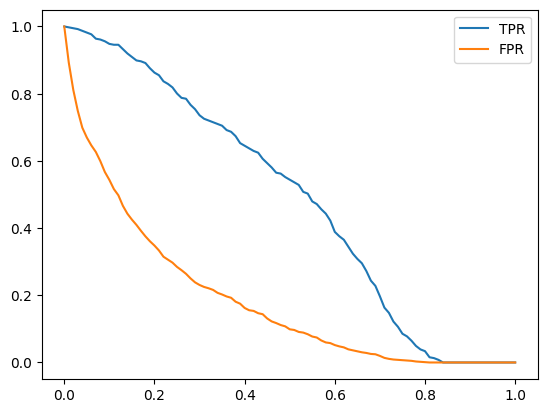

In [39]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

### Random model

In [40]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val)).round(3)

In [41]:
y_rand

array([0.417, 0.72 , 0.   , ..., 0.774, 0.334, 0.089])

In [42]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [43]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [44]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [45]:
df_rand

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,386,1023,0,0,1.000000,1.000000
1,0.01,382,1013,4,10,0.989637,0.990225
2,0.02,379,995,7,28,0.981865,0.972630
3,0.03,375,979,11,44,0.971503,0.956989
4,0.04,372,971,14,52,0.963731,0.949169
...,...,...,...,...,...,...,...
96,0.96,14,41,372,982,0.036269,0.040078
97,0.97,12,36,374,987,0.031088,0.035191
98,0.98,8,20,378,1003,0.020725,0.019550
99,0.99,6,9,380,1014,0.015544,0.008798


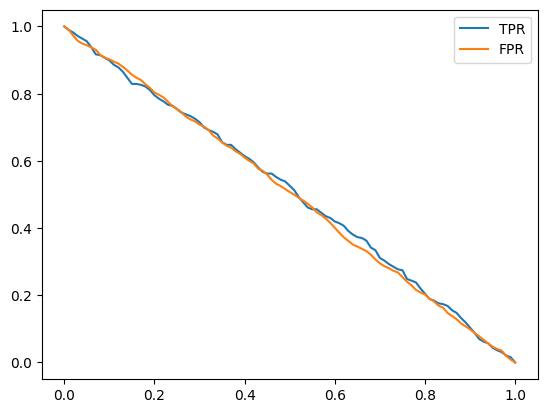

In [46]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

In [47]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()

In [48]:
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [49]:
y_ideal = np.repeat([0, 1], [num_neg, num_pos])

In [50]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [51]:
((y_ideal_pred >= 0.726) == y_ideal).mean()

np.float64(1.0)

In [52]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

In [53]:
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,386,882,0,141,1.000000,0.862170
20,0.2,386,741,0,282,1.000000,0.724340
30,0.3,386,600,0,423,1.000000,0.586510
40,0.4,386,459,0,564,1.000000,0.448680
50,0.5,386,319,0,704,1.000000,0.311828
60,0.6,386,178,0,845,1.000000,0.173998
70,0.7,386,37,0,986,1.000000,0.036168
80,0.8,282,0,104,1023,0.730570,0.000000
90,0.9,141,0,245,1023,0.365285,0.000000


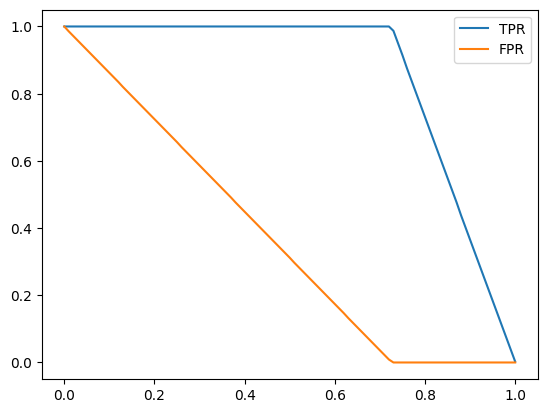

In [54]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

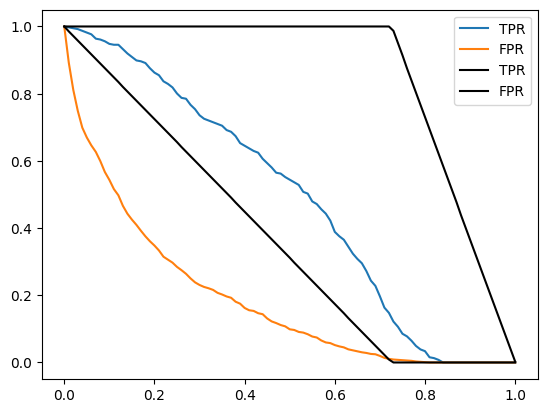

In [55]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR', color='black')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR', color='black')

plt.legend()

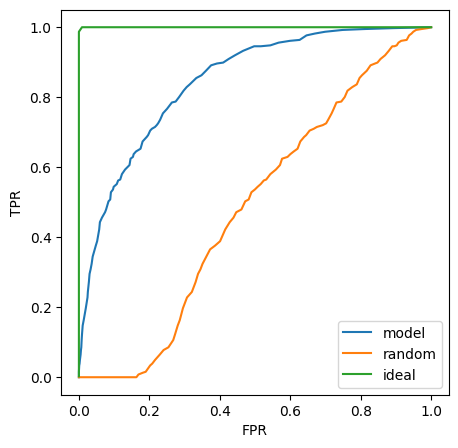

In [56]:
plt.figure(figsize=(5,5))
plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot(df_rand.fpr, df_scores.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()


In [57]:
from sklearn.metrics import roc_curve

In [58]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

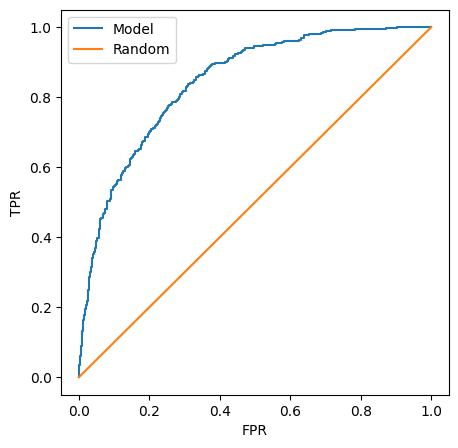

In [59]:
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Model')
plt.plot([0,1], [0,1], label="Random")

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

### 4.6 ROC AUC

In [60]:
from sklearn.metrics import auc

In [61]:
auc(fpr, tpr)

np.float64(0.8438201165929731)

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

np.float64(0.8438201165929731)

In [63]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [64]:
import random

In [65]:
pos_ind = random.randint(0, len(pos) - 1)
neg_ind = random.randint(0, len(neg) - 1)

In [66]:
pos[pos_ind] > neg[neg_ind]

np.True_

In [73]:
n = 100000
success = 0

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1) 

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

0.84345

In [77]:
n=50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

In [78]:
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84648)